# Linear models with Keras (TensorFlow) and scikit-learn

## Dependencies

In [ ]:
!pip install -U pandas
!pip install -U matplotlib
!pip install -U tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

## Linear Regression

Τhe linear regression algorithm fits multiple lines on the data points and returns the line (or a hyper-plane) that results in the least error.


### We will first run an example with scikit-learn

Using material from: [https://stackabuse.com/linear-regression-in-python-with-scikit-learn/](https://stackabuse.com/linear-regression-in-python-with-scikit-learn/)

We will deal with only one variable. Thus, we want to learn the $w_1$ and $w_0$ values of the equation below $$y = w_1 x_1 + w_0$$

Download the data.

In [2]:
!gdown --id 1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw
To: /content/student_scores.csv
100% 214/214 [00:00<00:00, 710kB/s]


In [3]:
student_data = pd.read_csv('student_scores.csv')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Text(0, 0.5, 'Percentage Score')

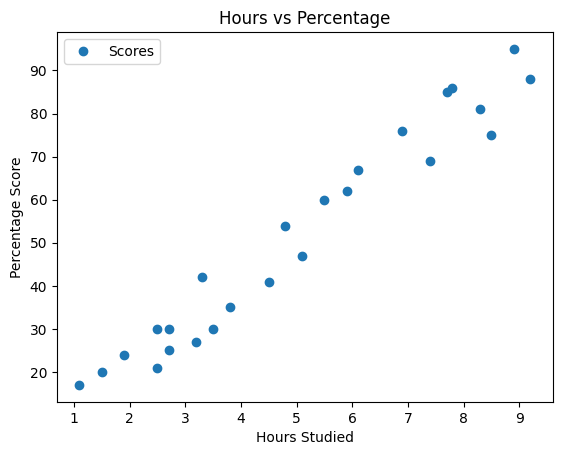

In [4]:
student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

Two different APIs provided

* LinearRegression API

In [5]:
from sklearn.model_selection import train_test_split
X_students = student_data.iloc[:, :-1].values
y_students = student_data.iloc[:, 1].values
X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(X_students, y_students,
                                                                                        test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train_students, y_train_students)

Text(0, 0.5, 'Percentage Score')

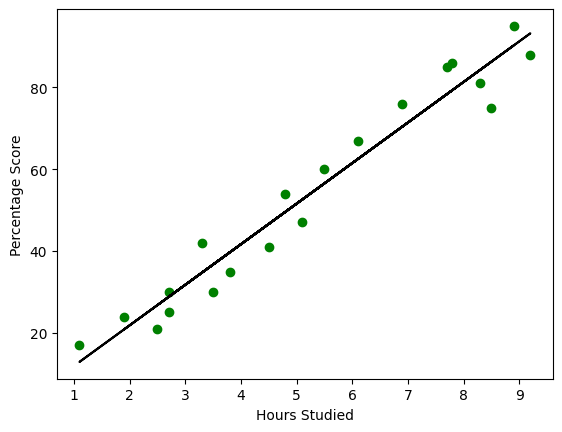

In [7]:
plt.scatter(X_train_students, y_train_students,color='g')
plt.plot(X_train_students, linear_regression.predict(X_train_students),color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [8]:
pd.DataFrame({'Actual': y_test_students, 'Predicted': linear_regression.predict(X_test_students)})

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0, 0.5, 'Percentage Score')

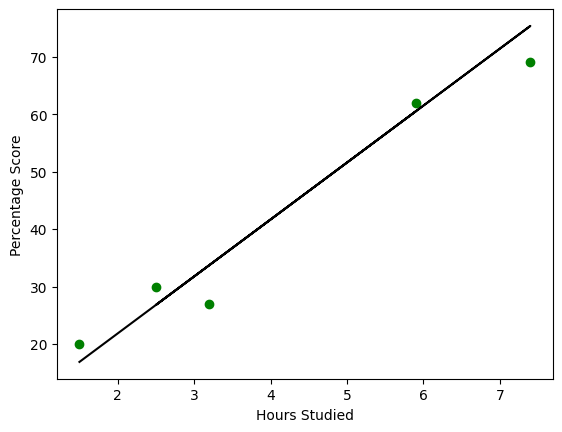

In [9]:
plt.scatter(X_test_students, y_test_students,color='g')
plt.plot(X_test_students, linear_regression.predict(X_test_students),color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [10]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test_students,
                                                        linear_regression.predict(X_test_students)))

Mean Squared Error: 21.598769307217456


* SGDRegressor API

For SGDRegressor you can specify a loss function and it uses Stochastic Gradient Descent (SGD) to fit. For SGD you run the training set one data point at a time and update the parameters according to the error gradient.

In simple words - you can train SGDRegressor on the training dataset, that does not fit into RAM. Also, you can update the SGDRegressor model with a new batch of data without retraining on the whole dataset.

In [ ]:
from sklearn.linear_model import SGDRegressor
linear_regression_sgd = SGDRegressor()
linear_regression_sgd.fit(X_train_students, y_train_students)

Text(0, 0.5, 'Percentage Score')

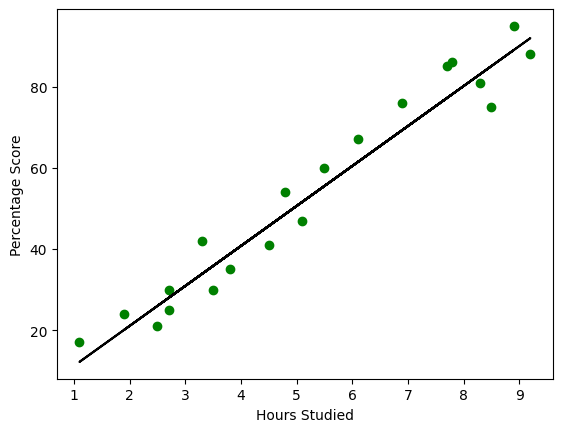

In [12]:
plt.scatter(X_train_students, y_train_students, color='g')
plt.plot(X_train_students, linear_regression_sgd.predict(X_train_students), color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [13]:
pd.DataFrame({'Actual': y_test_students, 'Predicted': linear_regression_sgd.predict(X_test_students)})

,Actual,Predicted
0,20,16.106537
1,27,32.860493
2,69,74.252620
3,30,25.961805
4,62,59.469718


Text(0, 0.5, 'Percentage Score')

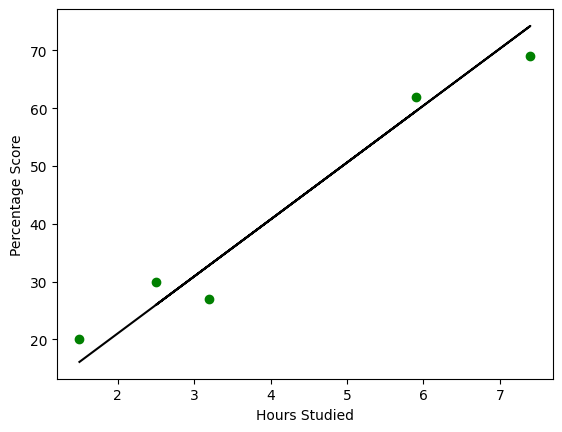

In [14]:
plt.scatter(X_test_students, y_test_students,color='g')
plt.plot(X_test_students, linear_regression_sgd.predict(X_test_students),color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [15]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_students,
                                                        linear_regression_sgd.predict(X_test_students)))

Mean Squared Error: 19.960760216964243


### Keras can also be used to create a Linear Regression model!

In [16]:
linear_regression_keras = tf.keras.models.Sequential()
linear_regression_keras.add(tf.keras.layers.Dense(units=1))

linear_regression_keras.compile(loss=tf.keras.losses.MeanSquaredError(),
                                optimizer=tf.keras.optimizers.SGD())
linear_regression_keras.fit(X_train_students, y_train_students,
                            epochs=10, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 352ms/step - loss: 4393.8750
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 452.5392
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 71.6572
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 34.8495
Epoch 5/10
1/1 [==============================] - 0s 8ms/step - loss: 31.2924
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 30.9486
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 30.9152
Epoch 8/10
1/1 [==============================] - 0s 13ms/step - loss: 30.9119
Epoch 9/10
1/1 [==============================] - 0s 13ms/step - loss: 30.9115
Epoch 10/10
1/1 [==============================] - 0s 13ms/step - loss: 30.9114


1/1 [==============================] - 0s 161ms/step


Text(0, 0.5, 'Percentage Score')

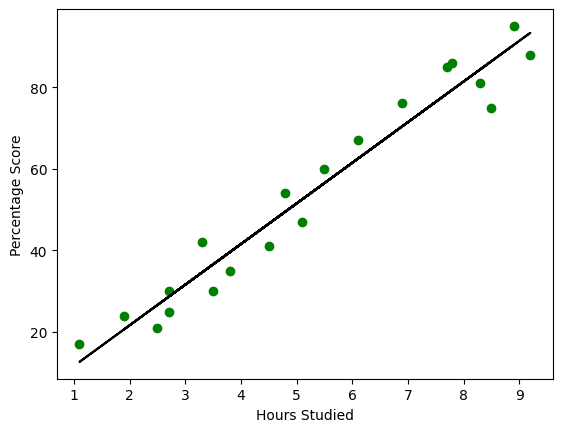

In [17]:
plt.scatter(X_train_students, y_train_students, color='g')
plt.plot(X_train_students, linear_regression_keras.predict(X_train_students),
         color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [18]:
pd.DataFrame({'Actual': y_test_students, 'Predicted': linear_regression_keras.predict(X_test_students).flatten()})

1/1 [==============================] - 0s 27ms/step


,Actual,Predicted
0,20,16.679546
1,27,33.598652
2,69,75.398788
3,30,26.631962
4,62,60.470169


1/1 [==============================] - 0s 29ms/step


Text(0, 0.5, 'Percentage Score')

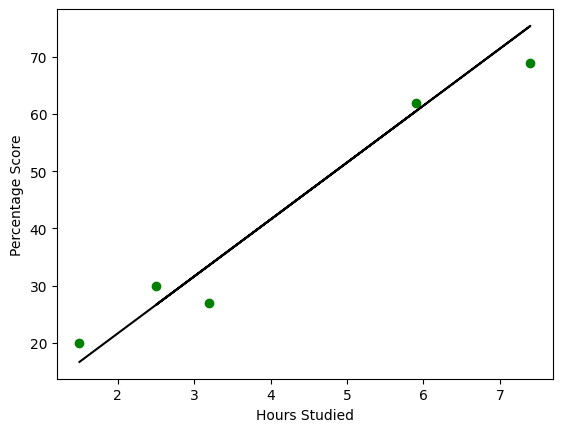

In [19]:
plt.scatter(X_test_students, y_test_students, color='g')
plt.plot(X_test_students, linear_regression_keras.predict(X_test_students),
         color='k')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

In [20]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_students,
                                                        linear_regression_keras.predict(X_test_students)))

1/1 [==============================] - 0s 20ms/step
Mean Squared Error: 21.83923532316403


## Logistic Regression

We will use the IMDB dataset for sentiment analysis. The dataset consists of movie reviews with positive or negative sentiment.

In [21]:
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = tf.keras.datasets.imdb.load_data()

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train_imdb])
x_test_imdb = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test_imdb])

1641221/1641221 [==============================] - 0s 0us/step


We need to create a binary representation of each review.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# min-df --> when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
binary_vectorizer = CountVectorizer(binary=True, min_df=100)
x_train_imdb_binary = binary_vectorizer.fit_transform(x_train_imdb)
x_test_imdb_binary = binary_vectorizer.transform(x_test_imdb)
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)

Vocabulary size: 3834


We need to convert the the sparse array into a NumPy.

In [23]:
type(x_train_imdb_binary[0])

scipy.sparse._csr.csr_matrix

In [24]:
x_train_imdb_binary = x_train_imdb_binary.toarray()
x_test_imdb_binary = x_test_imdb_binary.toarray()

In [25]:
type(x_train_imdb_binary[0])

numpy.ndarray

### Beginning with scikit-learn, again two APIs available


* LogisticRegression API

In [ ]:
from sklearn.linear_model import LogisticRegression

#Algorithm to use in the optimization problem.
#Each solver tries to find the parameter weights that minimize a cost function
log = LogisticRegression()
log.fit(x_train_imdb_binary, y_train_imdb)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test_imdb, log.predict(x_test_imdb_binary)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



* SGDClassifier API

In [28]:
from sklearn.linear_model import SGDClassifier

log_sgd = SGDClassifier(loss='log')
log_sgd.fit(x_train_imdb_binary, y_train_imdb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log')

In [ ]:
print(metrics.classification_report(y_test_imdb, log_sgd.predict(x_test_imdb_binary)))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     12500
           1       0.82      0.91      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



### Logistic regression with Keras

In [29]:
log_keras = tf.keras.models.Sequential([
      tf.keras.layers.Dense(units=1, activation='sigmoid')
])

log_keras.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.SGD(),
                  metrics=['binary_accuracy'])
log_keras.fit(x=x_train_imdb_binary, y=y_train_imdb,
              epochs=20, verbose=1, batch_size=32)

Epoch 1/20
782/782 [==============================] - 2s 3ms/step - loss: 0.5836 - binary_accuracy: 0.7390
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 0.4707 - binary_accuracy: 0.8227
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 0.4237 - binary_accuracy: 0.8406
Epoch 4/20
782/782 [==============================] - 3s 3ms/step - loss: 0.3963 - binary_accuracy: 0.8496
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 0.3774 - binary_accuracy: 0.8559
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3633 - binary_accuracy: 0.8608
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3523 - binary_accuracy: 0.8639
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3431 - binary_accuracy: 0.8669
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3354 - binary_accuracy: 0.8696
Epoch 10/20
782/782 [================

In [30]:
print(log_keras.evaluate(x_test_imdb_binary, y_test_imdb))

782/782 [==============================] - 2s 2ms/step - loss: 0.3171 - binary_accuracy: 0.8722
[0.31713977456092834, 0.8722000122070312]
